In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

try:
    import missingno as msno
    missing_values = True
except:
    missing_values = False
    print("Se recomienda instalar la biblioteca 'missingno' para crear las visualizaciones de valores perdidos")
    print("Comando: 'pip install missingno'")

## Lectura de datos

In [2]:
train = pd.read_csv("train.csv", na_values="NaN") # Definimos na_values para identificar bien los valores perdidos
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Viendo los tipos de las columnas

In [3]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

#### Viendo columnas de tipo object, para preprocesar

In [4]:
lista_columnas_str = list(train.dtypes[train.dtypes == 'object'].index)
train.dtypes[train.dtypes == 'object'].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
dict_valores_cols_str = {}
for col in lista_columnas_str:
    dict_valores_cols_str[col] = train[col].value_counts().to_dict()

#### Viendo los valores que toman esas columnas

In [6]:
dict_valores_cols_str

{'MSZoning': {'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10},
 'Street': {'Pave': 1454, 'Grvl': 6},
 'Alley': {'Grvl': 50, 'Pave': 41},
 'LotShape': {'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10},
 'LandContour': {'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36},
 'Utilities': {'AllPub': 1459, 'NoSeWa': 1},
 'LotConfig': {'Inside': 1052,
  'Corner': 263,
  'CulDSac': 94,
  'FR2': 47,
  'FR3': 4},
 'LandSlope': {'Gtl': 1382, 'Mod': 65, 'Sev': 13},
 'Neighborhood': {'NAmes': 225,
  'CollgCr': 150,
  'OldTown': 113,
  'Edwards': 100,
  'Somerst': 86,
  'Gilbert': 79,
  'NridgHt': 77,
  'Sawyer': 74,
  'NWAmes': 73,
  'SawyerW': 59,
  'BrkSide': 58,
  'Crawfor': 51,
  'Mitchel': 49,
  'NoRidge': 41,
  'Timber': 38,
  'IDOTRR': 37,
  'ClearCr': 28,
  'StoneBr': 25,
  'SWISU': 25,
  'MeadowV': 17,
  'Blmngtn': 17,
  'BrDale': 16,
  'Veenker': 11,
  'NPkVill': 9,
  'Blueste': 2},
 'Condition1': {'Norm': 1260,
  'Feedr': 81,
  'Artery': 48,
  'RRAn': 26,
  'PosN': 19,
  'RRAe': 11,
  '

## Visualización

Visualizaciones para comprender la distribución y valores que toman las variables

C:\Users\octat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


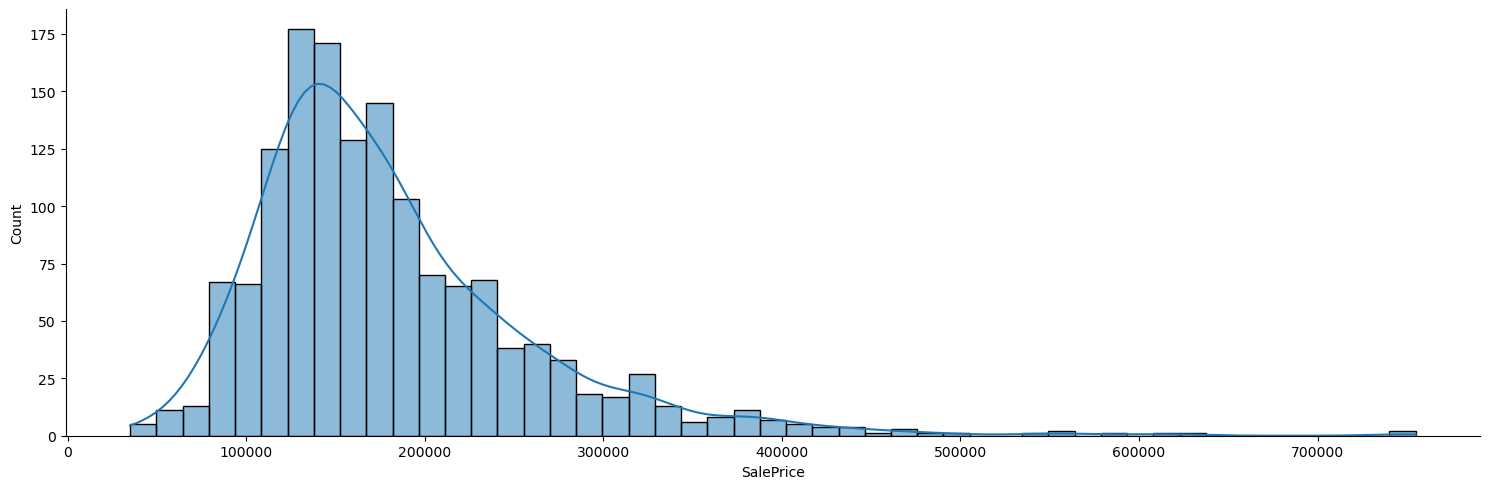

In [7]:
sns.displot(data=train, x="SalePrice", aspect=3, kde=True)

C:\Users\octat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


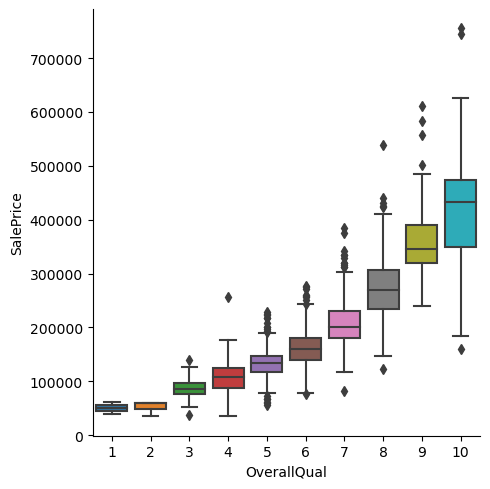

In [8]:
sns.catplot(data=train, y="SalePrice", x="OverallQual", kind="box")

C:\Users\octat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


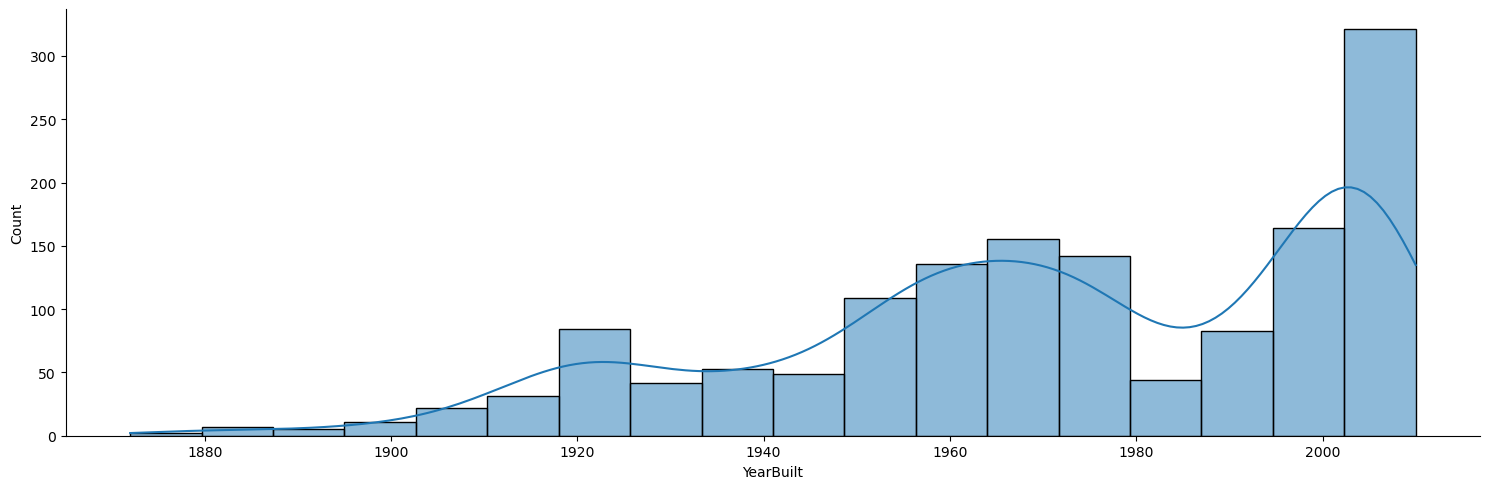

In [9]:
sns.displot(data=train, x="YearBuilt", aspect=3, kde=True)

## Valores perdidos

In [10]:
# Ordenar las columnas según la cantidad de valores nulos
valores_nulos = train.isnull().sum().sort_values(ascending=True)
sorted_columns = valores_nulos.index

# if missing_values:
#     print(valores_nulos[valores_nulos > 0])
#     # Visualizar valores perdidos con missingno
#     msno.bar(train[sorted_columns])
# else:
print(valores_nulos[valores_nulos > 0])

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


### No parece haber muchos valores nulos. Se aprecia correlación en la ausencia de algunas variables

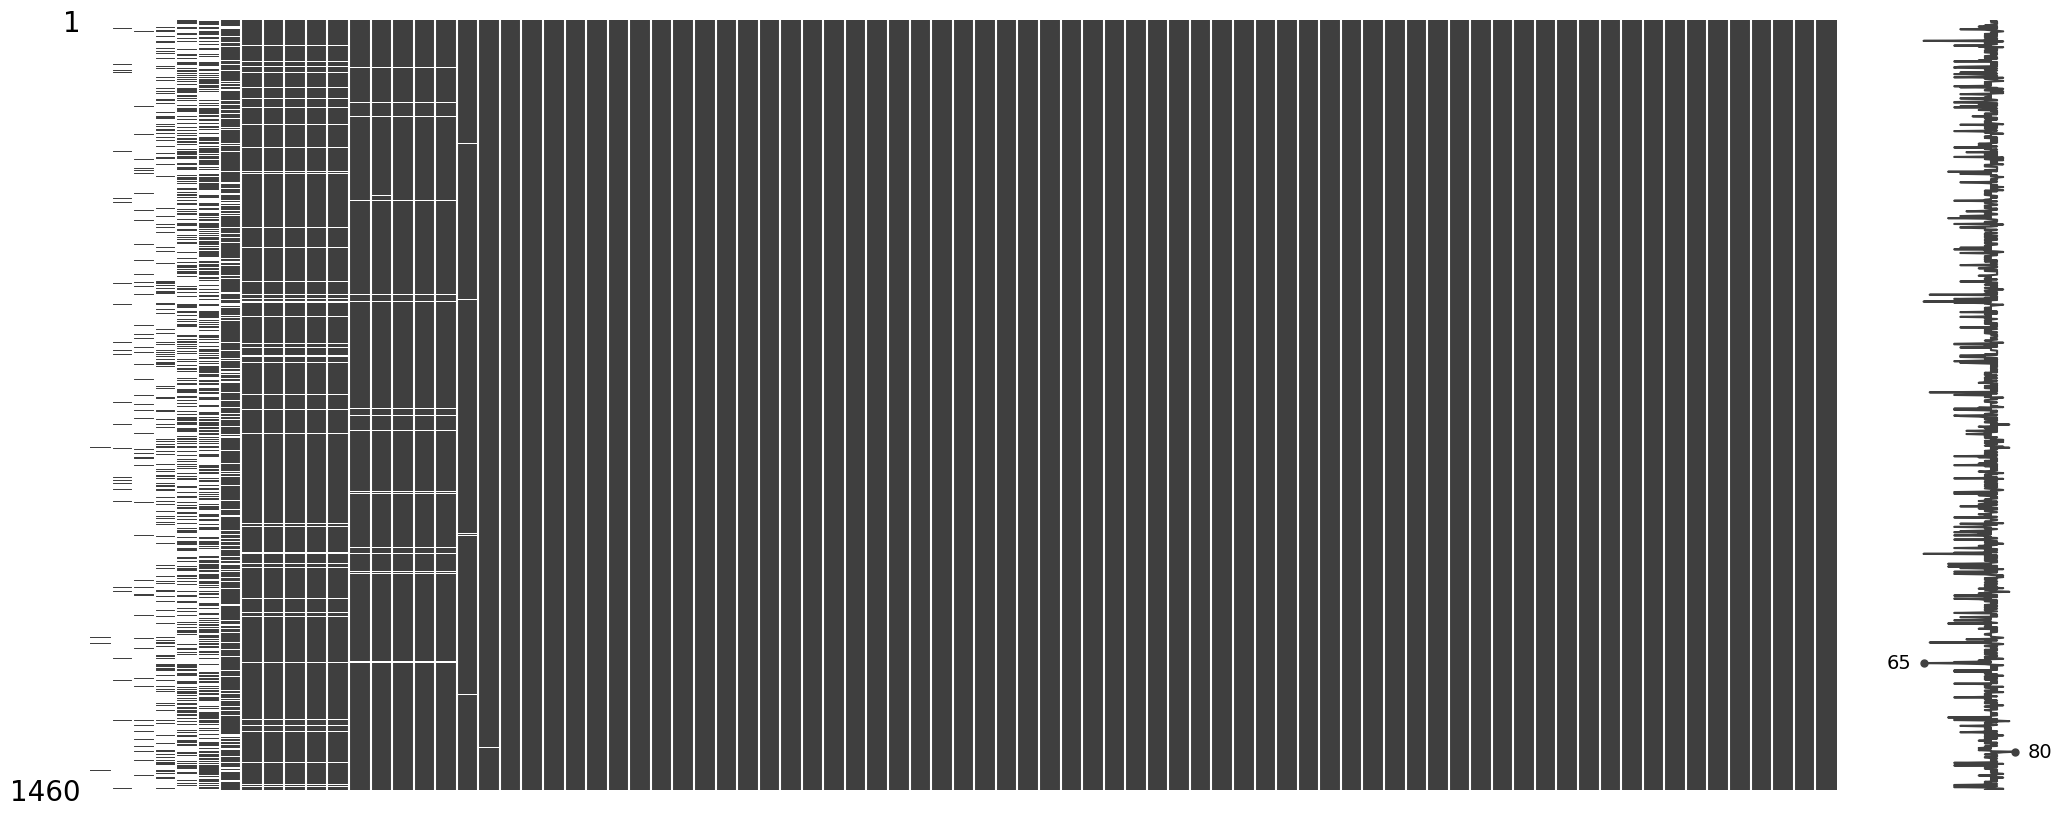

In [11]:
if missing_values:
    msno.matrix(train[valores_nulos.sort_values(ascending=False).index])

<Axes: >

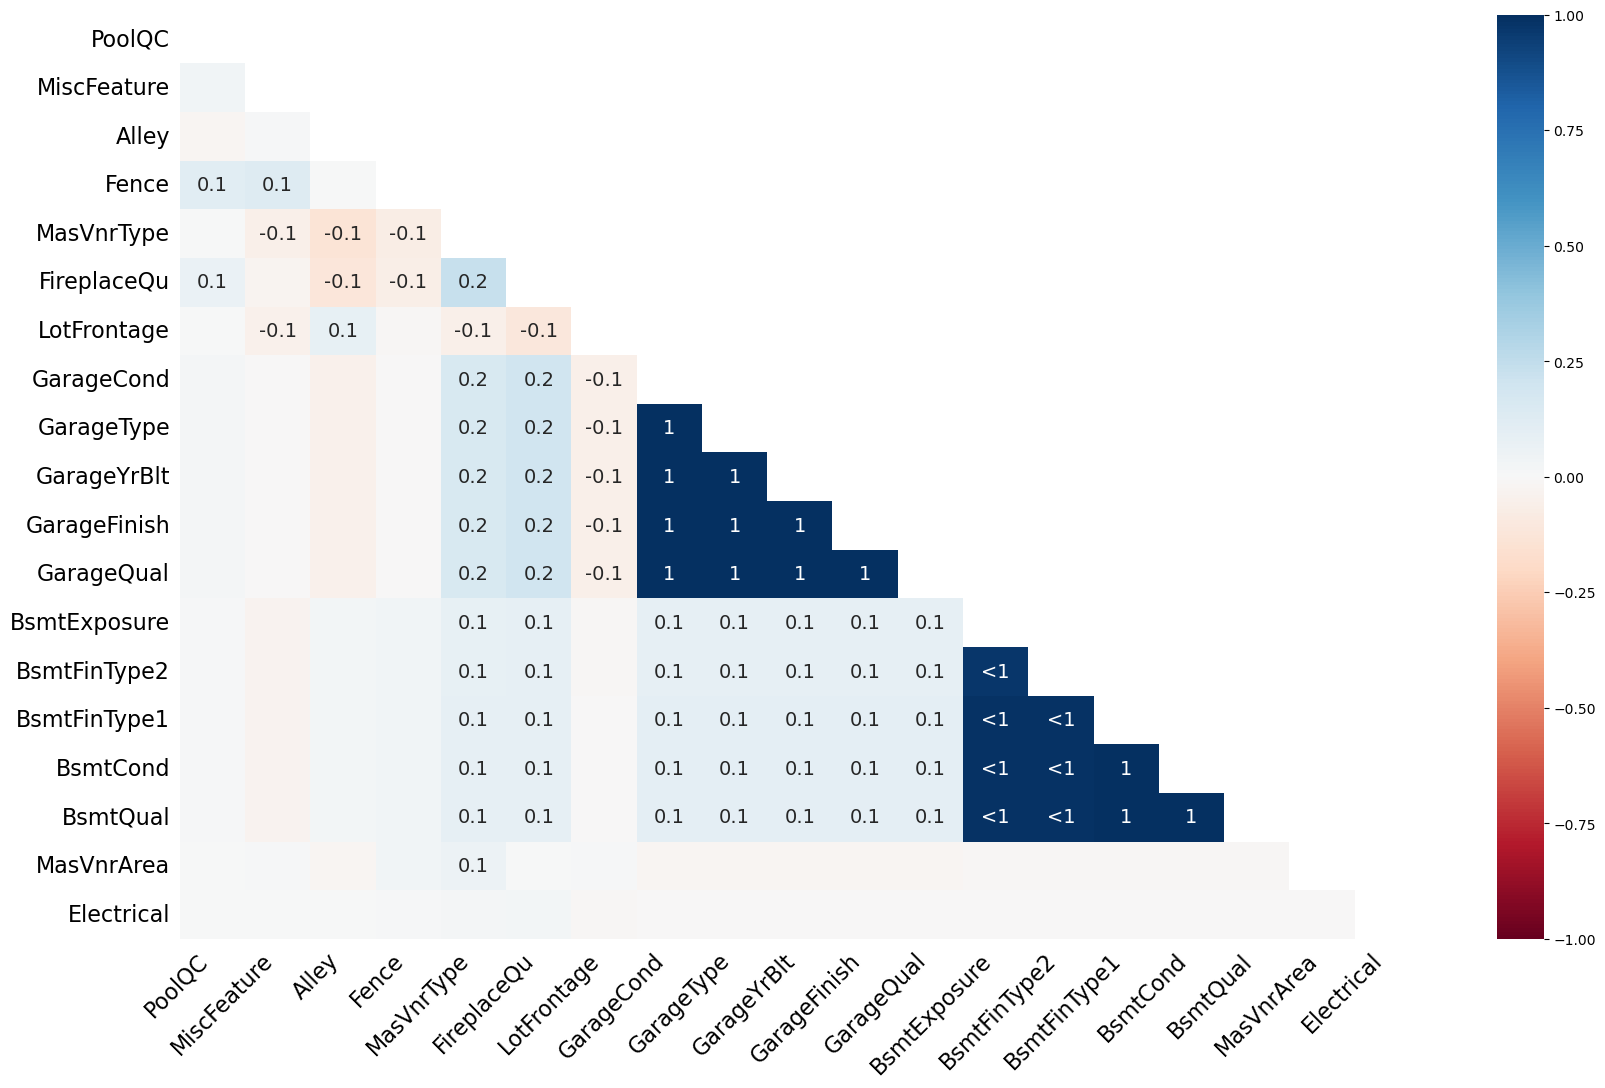

In [12]:
msno.heatmap(train[valores_nulos.sort_values(ascending=False).index])

## Correlaciones

Visualizaciones para comprender la correlaciones entre variables y su correlación con la variable objetivo

<Axes: >

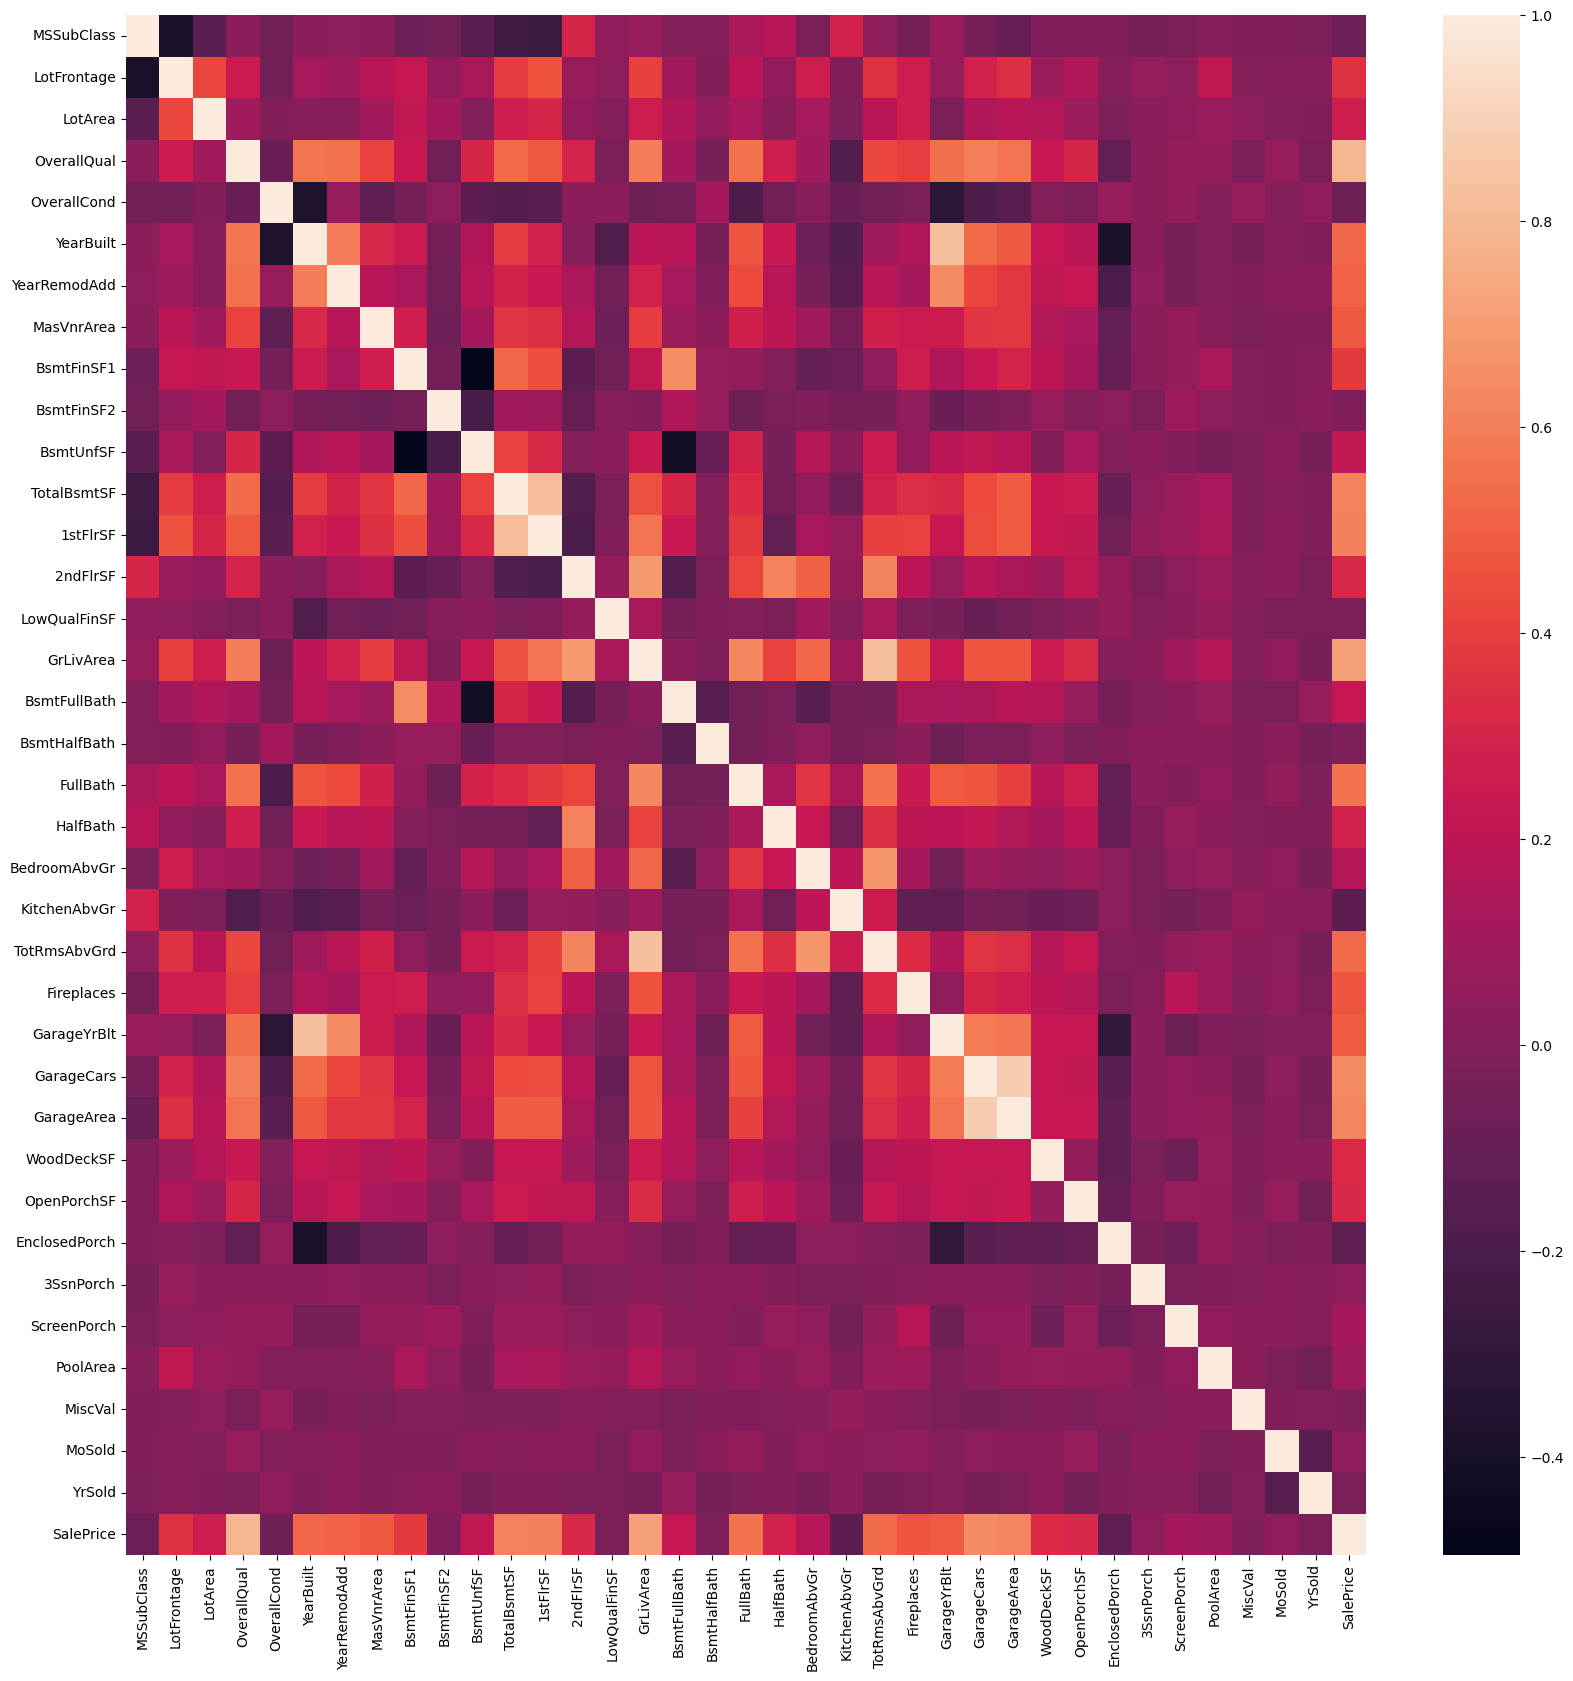

In [13]:
df_corr = train.select_dtypes(exclude='object').drop(['Id'], axis=1).copy()

# Obtener la correlación entre las columnas numéricas del df
correlacion = df_corr.corr()

# Configurar el tamaño de la figura con Matplotlib
plt.figure(figsize=(20, 20))

sns.heatmap(correlacion)

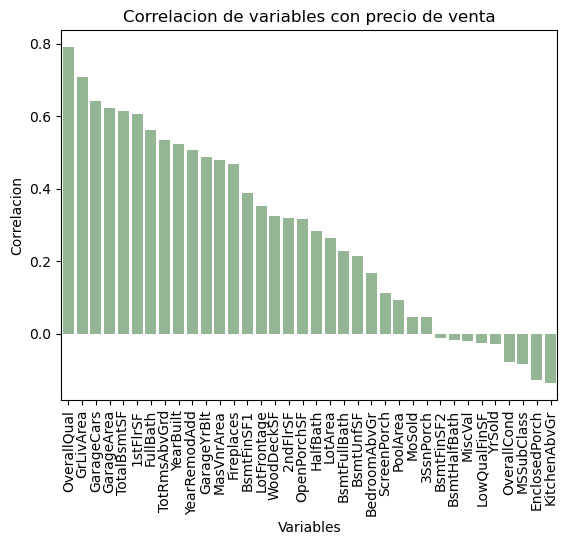

In [14]:
# Obtener la correlación entre el precio y las columnas numéricas del df
valores_venta = df_corr['SalePrice']

# Obtener la correlación entre los valores Y y las columnas numéricas del DataFrame
correlacion = df_corr.drop('SalePrice', axis=1).corrwith(valores_venta)
correlacion = correlacion.sort_values(ascending=False)



sns.barplot(x=correlacion.index, y=correlacion.values, color = "darkseagreen", saturation = 0.75)

# Rotar los nombres en el eje x para que estén verticales
plt.xticks(rotation=90)

# Agregar títulos y etiquetas
plt.title('Correlacion de variables con precio de venta')
plt.xlabel('Variables')
plt.ylabel('Correlacion')

# Mostrar la gráfica
plt.show()

## Preprocesamiento: Pasar algunas columnas a número con get_dummies (OneHotEncoder)

In [15]:
def añadir_columnas(df, cols_onehot):
    
    df = df.copy()
    
    for c in cols_onehot:
        # Usa get_dummies para realizar One-Hot Encoding
        df_encoded = pd.get_dummies(df[c], prefix=c)
        # Agrega las nuevas columnas como tipo ENTERO al DataFrame original
        df = pd.concat([df, df_encoded], axis=1)
        # Elimina la columna original
        df = df.drop(c, axis=1)
    
    return df

In [16]:
onehot_cols = ['Neighborhood', 'LotShape', 'MSZoning', 'LotConfig', 'KitchenQual', 'GarageType', 'HouseStyle', 'RoofStyle', 'Exterior1st']
train_dummies = añadir_columnas(train, onehot_cols)

## Correlaciones

Visualizaciones para comprender la correlación de las NUEVAS variables con la variable objetivo

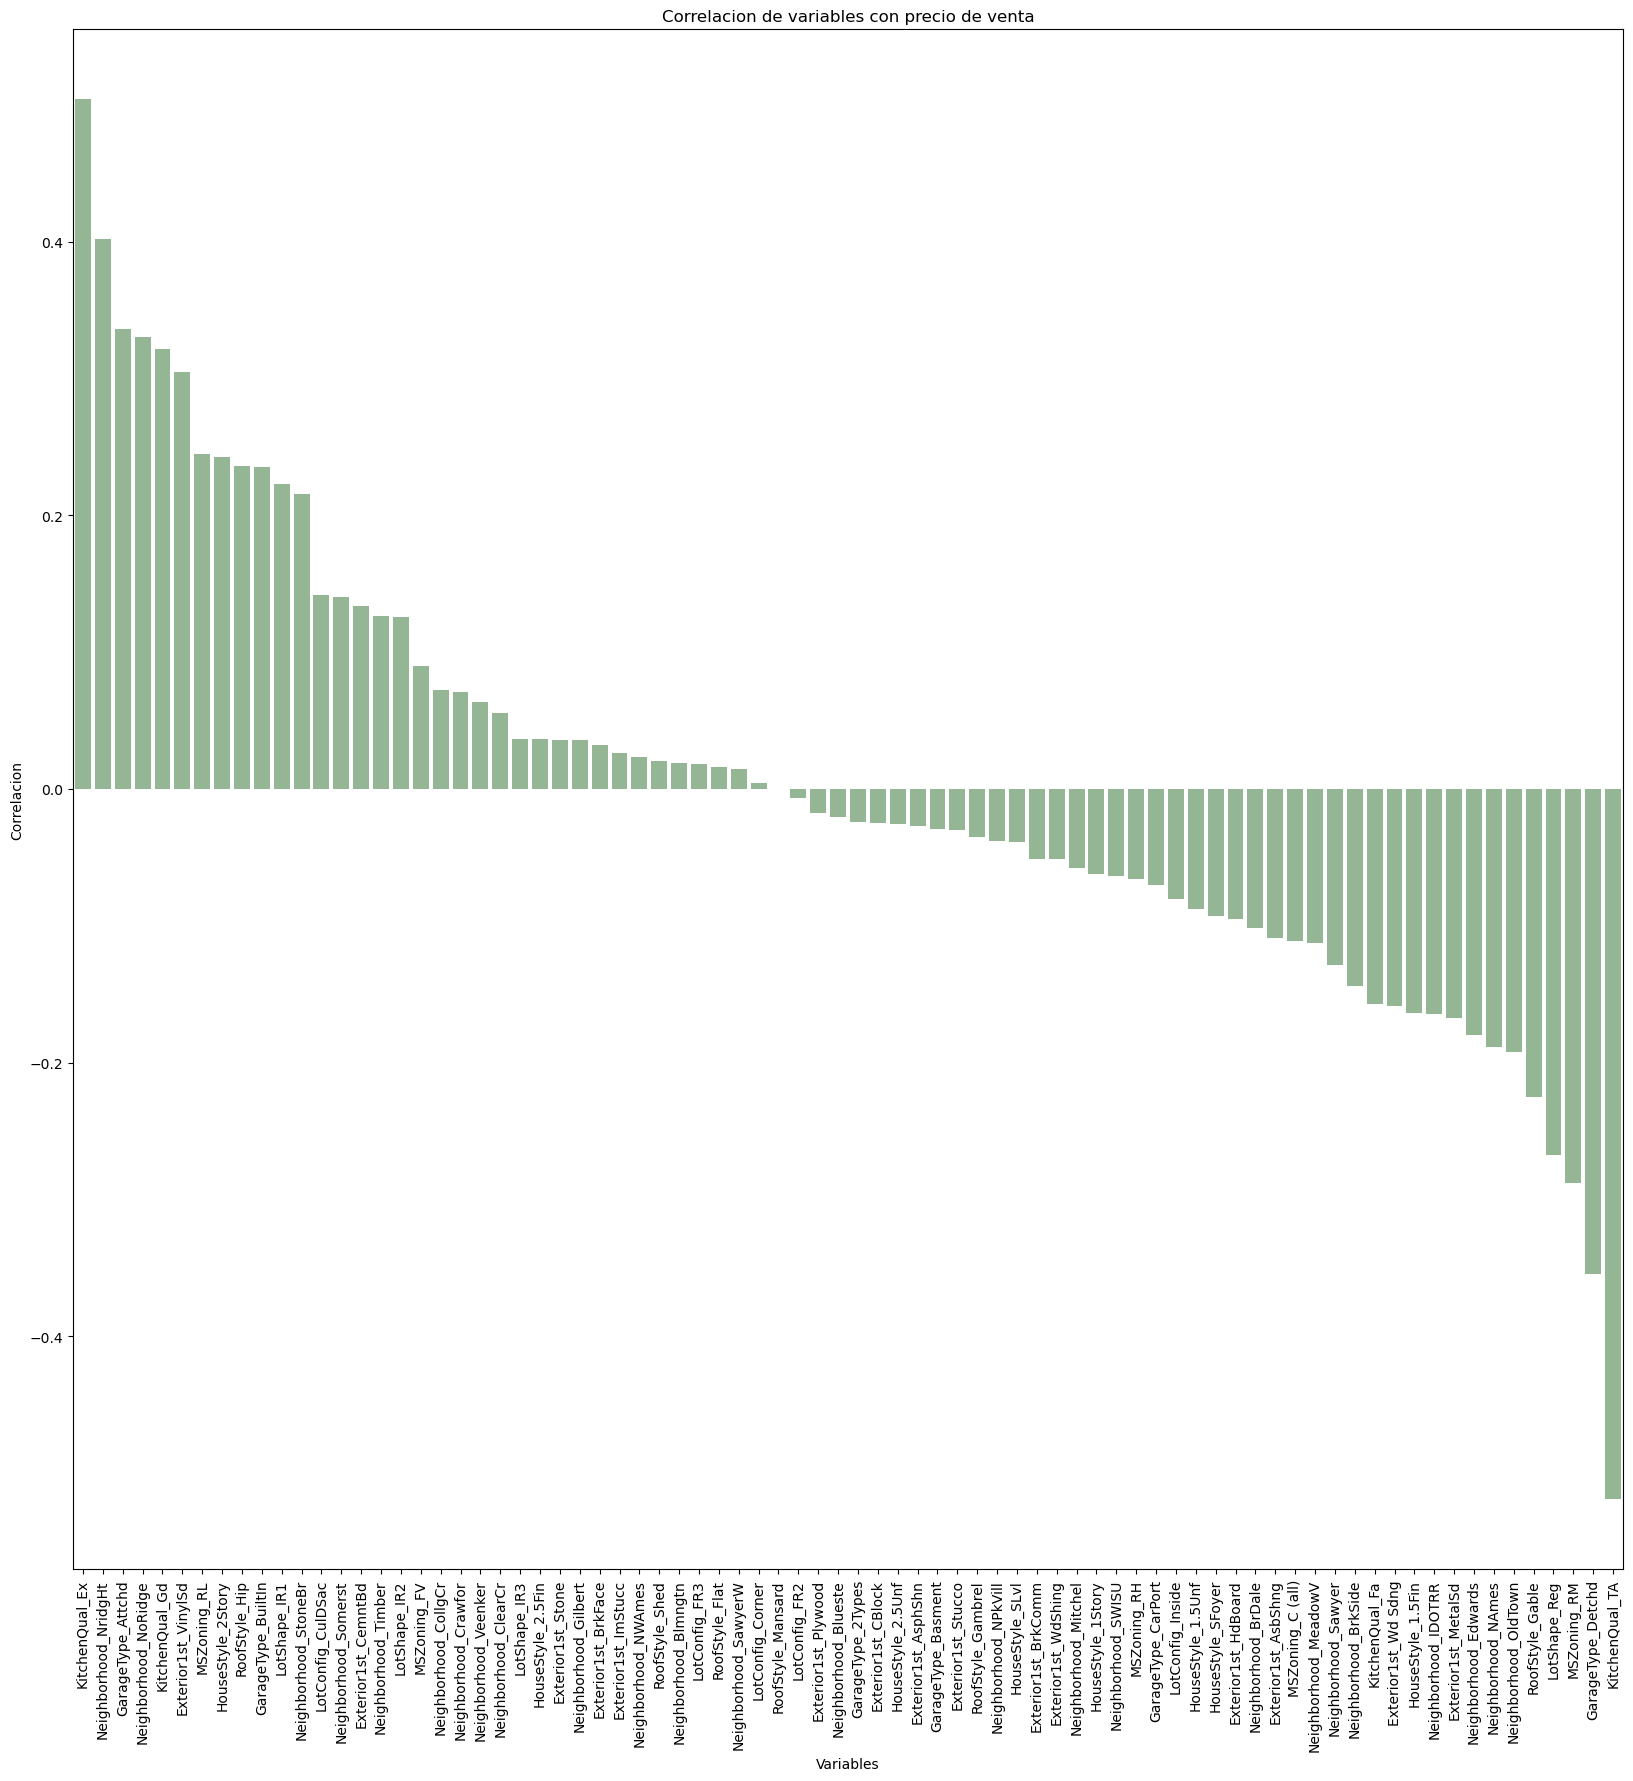

In [17]:
df_corr_dummies = train_dummies.select_dtypes(include='bool').astype(int).copy()

# Obtener la correlación entre el precio y las columnas numéricas del df
correlacion_dummies = df_corr_dummies.corrwith(valores_venta)
correlacion_dummies = correlacion_dummies.sort_values(ascending=False)

# Configurar el tamaño de la figura con Matplotlib
plt.figure(figsize=(20, 20))

sns.barplot(x=correlacion_dummies.index, y=correlacion_dummies.values, color = "darkseagreen", saturation = 0.75)

# Rotar los nombres en el eje x para que estén verticales
plt.xticks(rotation=90)

# Agregar títulos y etiquetas
plt.title('Correlacion de variables con precio de venta')
plt.xlabel('Variables')
plt.ylabel('Correlacion')

# Mostrar la gráfica
plt.show()

## Próximos pasos:
### Identificar variables ordinales y cambiarlas valores numéricos
### Utlizar algún Imputer para valores perdidos
### Ejecutar algún modelo